In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

df = pd.read_csv('StudentsPerformance.csv')


In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.isnull().sum()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
categorical_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [11]:
df['total_score'] = df[['math_score', 'reading_score', 'writing_score']].sum(axis=1)
df['average_score'] = df['total_score'] / 3
def performance_level(score):
    if score >= 90:
        return 'Excellent'
    elif score >= 75:
        return 'Good'
    elif score >= 60:
        return 'Average'
    else:
        return 'Needs Improvement'

df['performance_level'] = df['average_score'].apply(performance_level)


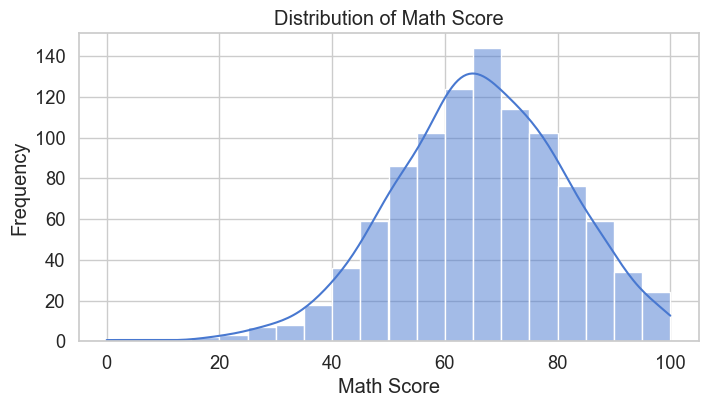

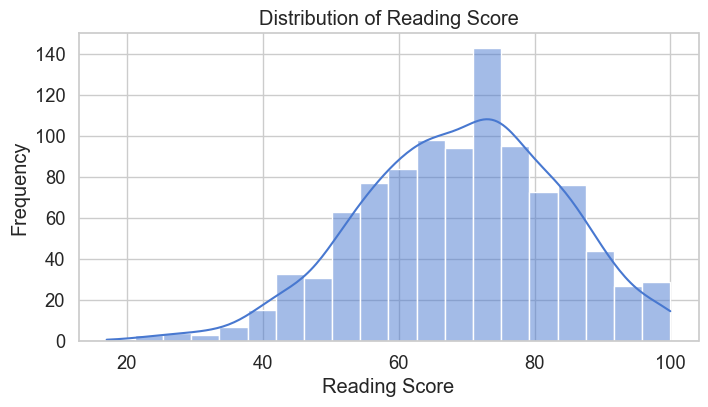

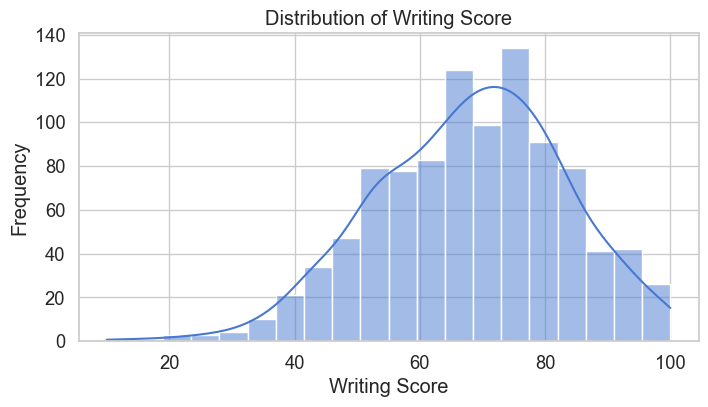

In [13]:
# Histograms for each subject
subjects = ['math_score', 'reading_score', 'writing_score']
for subject in subjects:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[subject], bins=20, kde=True)
    plt.title(f'Distribution of {subject.replace("_", " ").title()}')
    plt.xlabel(subject.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.show()


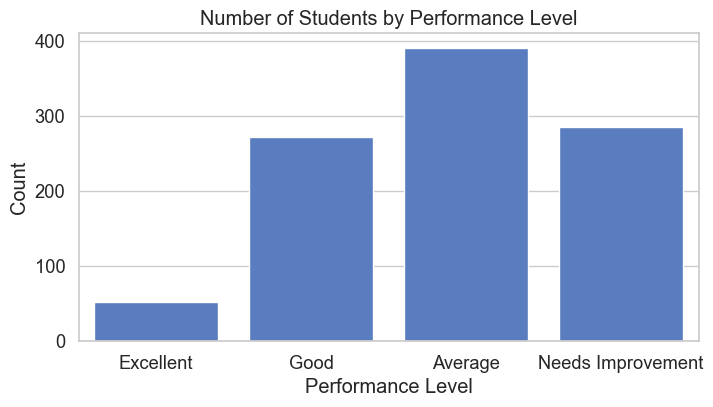

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='performance_level', order=['Excellent', 'Good', 'Average', 'Needs Improvement'])
plt.title('Number of Students by Performance Level')
plt.xlabel('Performance Level')
plt.ylabel('Count')
plt.show()


/var/folders/nr/h7qkxrqd4279c9p4j9myxr4m0000gn/T/ipykernel_55457/1046651551.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='gender', y='average_score', ci='sd')


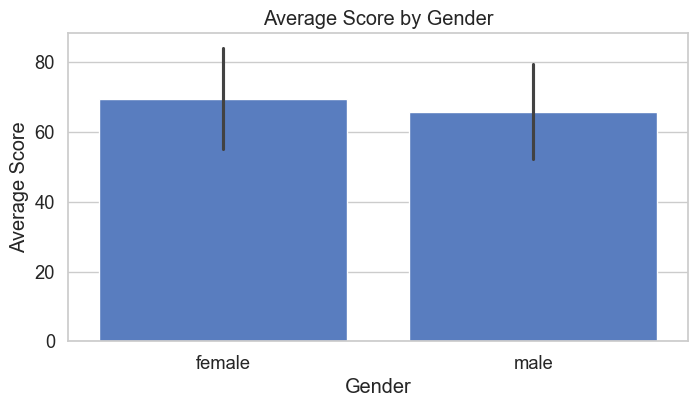

In [17]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='gender', y='average_score', ci='sd')
plt.title('Average Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.show()


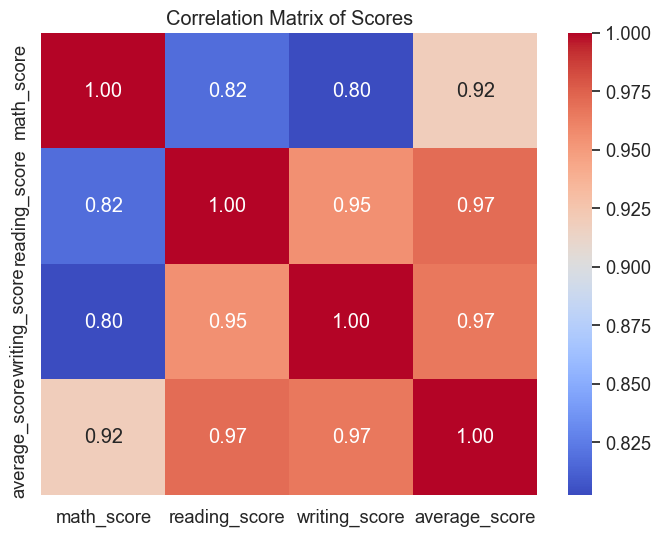

In [19]:
# Compute correlation matrix
corr_matrix = df[['math_score', 'reading_score', 'writing_score', 'average_score']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scores')
plt.show()


In [25]:
import pandas as pd
import numpy as np
!pip install country_converter >nul 2>&1
!pip install wordcloud
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 6.5 MB/s eta 0:00:00


In [29]:
df = pd.read_csv('StudentsPerformance.csv')

def highlight_rows(row):
    return ['background-color: lightcoral; color: white' if i % 2 == 0 else 'background-color: lightgrey; color: black' for i in range(len(row))]

df.head().style.apply(lambda x: highlight_rows(x), axis=1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


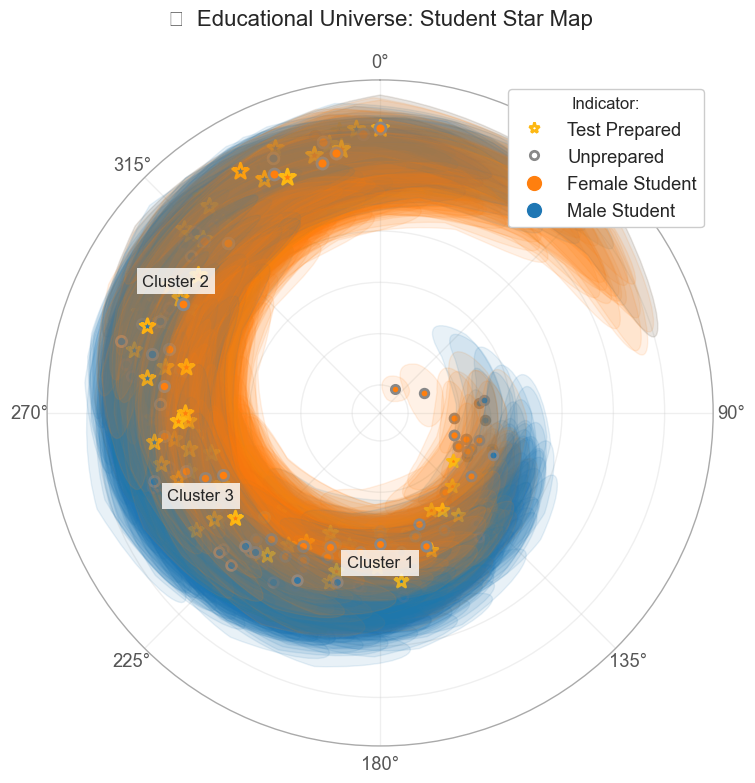

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Assuming you have your DataFrame 'df' already loaded
# Create the 'average_score' column based on the mean of math, reading, and writing scores
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Using a specific style for plotting
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

# Create a polar plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': 'polar'})

# Define color schemes
gender_colors = {'male': '#1f77b4', 'female': '#ff7f0e'} 
prep_colors = {'completed': '#FDB813', 'none': '#888888'}  

# Iterate through the DataFrame
for idx, row in df.iterrows():
    # Calculate angle and radius for the polar plot
    theta = row['average_score']/100 * 2*np.pi
    r = row['math score']/10
    # Set marker and size based on the test preparation status
    marker = '*' if row['test preparation course'] == 'completed' else 'o'
    size = 50 + row['writing score'] if row['test preparation course'] == 'completed' else 30 + row['reading score']/3
    color = gender_colors[row['gender']]
    edge_color = prep_colors['completed'] if row['test preparation course'] == 'completed' else prep_colors['none']
    
    # Define educational level radius and plot circles
    edu_levels = ["some high school", "high school", "some college", 
                 "associate's degree", "bachelor's degree", "master's degree"]
    if row['parental level of education'] in edu_levels:
        edu_radius = 5 + edu_levels.index(row['parental level of education'])*2
        circle = plt.Circle((theta, r), edu_radius/10, color=color, alpha=0.1)
        ax.add_patch(circle)

    # Plot the student points on the polar plot
    ax.scatter(theta, r, s=size, c=color, marker=marker, 
              edgecolors=edge_color, linewidths=2)

# KMeans clustering for 3 clusters based on average score and math score
coords = np.column_stack([df['average_score'], df['math score']])
kmeans = KMeans(n_clusters=3).fit(coords)
for i in range(3):
    cluster_center = kmeans.cluster_centers_[i]
    theta_center = cluster_center[0]/100 * 2*np.pi
    r_center = cluster_center[1]/10
    ax.text(theta_center, r_center, f'Cluster {i+1}', 
           fontsize=12, ha='center', va='center',
           bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Set the title and formatting for the plot
ax.set_title("📚  Educational Universe: Student Star Map", pad=20, fontsize=16)
ax.grid(True, alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_yticklabels([])

# Legend for the markers and clusters
legend_elements = [
    plt.Line2D([0], [0], marker='*', color='w', label='Test Prepared',
              markerfacecolor='none', markeredgecolor='#FDB813', markersize=8, markeredgewidth=2),
    plt.Line2D([0], [0], marker='o', color='w', label='Unprepared',
              markerfacecolor='none', markeredgecolor='#888888', markersize=6, markeredgewidth=2),
    plt.Line2D([0], [0], marker='o', color='w', label='Female Student',
              markerfacecolor='#ff7f0e', markersize=12),
    plt.Line2D([0], [0], marker='o', color='w', label='Male Student',
              markerfacecolor='#1f77b4', markersize=12)
]

# Add legend to the plot
ax.legend(handles=legend_elements, loc='upper right', framealpha=1, 
         title="Indicator:", title_fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [43]:
df_melted = df.melt(
    id_vars=['parental level of education', 'gender'],
    value_vars=['math score', 'reading score', 'writing score'],
    var_name='subject',
    value_name='score'
)

fig2 = px.treemap(
    df_melted,
    path=['parental level of education', 'gender', 'subject'],
    values='score',
    color='score',
    color_continuous_scale='Purples',
    title="<b>🎓Parent Education and Course-Based Success</b>"
)

fig2.update_layout(
    margin=dict(t=70, l=25, r=25, b=25),
    coloraxis_colorbar=dict(title='Point')
)
fig2.update_traces(
    texttemplate="<b>%{label}</b><br>%{value:.1f}",
    hovertemplate="<b>%{label}</b><br>Puan: %{value:.1f}<br>Ebeveyn Eğitimi: %{parent}"
)
fig2.show(renderer='iframe_connected')

In [45]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

fig = px.bar_polar(df, r="average_score", theta="gender",
                  color="gender", template="plotly_dark",
                  color_discrete_sequence=['#8B0000', '#FFD700'],
                  title="<b>📊 Grade Point Averages by Gender</b>")
fig.show(renderer='iframe_connected')

In [47]:
df_melted = df.melt(id_vars=['gender'], 
                   value_vars=['math score', 'reading score', 'writing score'],
                   var_name='subject', value_name='score')

fig = px.violin(df_melted, y='score', x='subject', color='gender',
               box=True, points="all",
               color_discrete_sequence=['#8B0000', '#FFD700'],
               title="<b>🎻 Distribution of Scores by Gender and Courses</b>")
fig.show(renderer='iframe_connected')

In [49]:
fig = px.scatter_3d(df, x='math score', y='reading score', z='writing score',
                   color='gender', symbol='gender',
                   color_discrete_sequence=['#8B0000', '#FFD700'],
                   title="<b>🧊 3D Distribution: Math, Reading, and Writing Scores</b>")
fig.update_traces(marker_size=5)
fig.show(renderer='iframe_connected')

In [51]:
df['test preparation course'] = df['test preparation course'].map({'yes': 'completed', 'no': 'none'})
fig = px.scatter(df, 
                x='math score', 
                y='reading score',
                color='gender', 
                facet_col='lunch',  
                title="<b>🔍 Lunch and Gender-Based Score Relationship</b>")
fig.show(renderer='iframe_connected')


In [53]:
df_melted = df.melt(id_vars=['race/ethnicity'], 
                   value_vars=['math score', 'reading score', 'writing score'],
                   var_name='score_type', value_name='score')

fig = px.bar(df_melted, x='race/ethnicity', y='score', color='score_type',
            animation_frame='score_type', range_y=[0,100],
            color_discrete_sequence=['#8B0000', '#FFD700', '#808080'],
            title="<b>🏃‍♂️ Development of Scores by Ethnicity (Animated)</b>")
fig.show(renderer='iframe_connected')

In [55]:
fig = px.violin(df, y=['math score', 'reading score', 'writing score'],
               box=True, points="all",
               color_discrete_sequence=['#8B0000', '#FFD700', '#808080'],
               title="<b>🎻 Distribution of Points According to Lunch and Test Preparation Status</b>")
fig.update_layout(yaxis_title="Score")
fig.show(renderer='iframe_connected')

In [57]:
import plotly.graph_objects as go


groups = df.groupby(['race/ethnicity', 'gender']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()


colors = ['#8B0000', '#FFD700', '#696969', '#B22222', '#DAA520', '#2F4F4F']


fig = go.Figure()

for idx, (_, group) in enumerate(groups.iterrows()):
    fig.add_trace(go.Scatterpolar(
        r=[group['math score'], group['reading score'], group['writing score']],
        theta=['Math', 'Reading', 'Writing'],
        fill='toself',
        name=f"{group['race/ethnicity']} - {group['gender']}",
        line=dict(color=colors[idx % len(colors)])  
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 100])),
    template="plotly_dark",
    title="<b>📡 Talent Profiles by Ethnicity and Gender</b>",
    hovermode="closest"
)

fig.show(renderer='iframe_connected')


In [59]:
fig = px.scatter(
    df,
    x='math score',
    y='reading score',
    animation_frame='parental level of education',
    color='gender',
    size='writing score',
    hover_name='race/ethnicity',
    range_x=[0, 100],
    range_y=[0, 100],
    title="<b>🎬 Evolution of Scores According to Parental Education Level</b>",
    color_discrete_sequence=['#8B0000', '#DAA520']  
)

fig.update_layout(
    template='plotly_dark',
    xaxis=dict(title='Math Score'),
    yaxis=dict(title='Reading Score')
)

fig.show(renderer='iframe_connected')


In [61]:
fig = px.parallel_coordinates(
    df,
    color='average_score',
    dimensions=['math score', 'reading score', 'writing score', 'parental level of education'],
    color_continuous_scale=['#8B0000', '#DAA520'],  # Kırmızı ve koyu sarı tonları
    title="<b>〽 Multidimensional Student Profile Analysis</b>"
)

fig.show(renderer='iframe_connected')

In [63]:
fig = px.treemap(
    df,
    path=['race/ethnicity', 'parental level of education', 'gender'],
    values='average_score',
    color='average_score',
    color_continuous_scale='RdBu',
    title="<b>🗺 Hierarchical Student Performance Map</b>"
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show(renderer='iframe_connected')

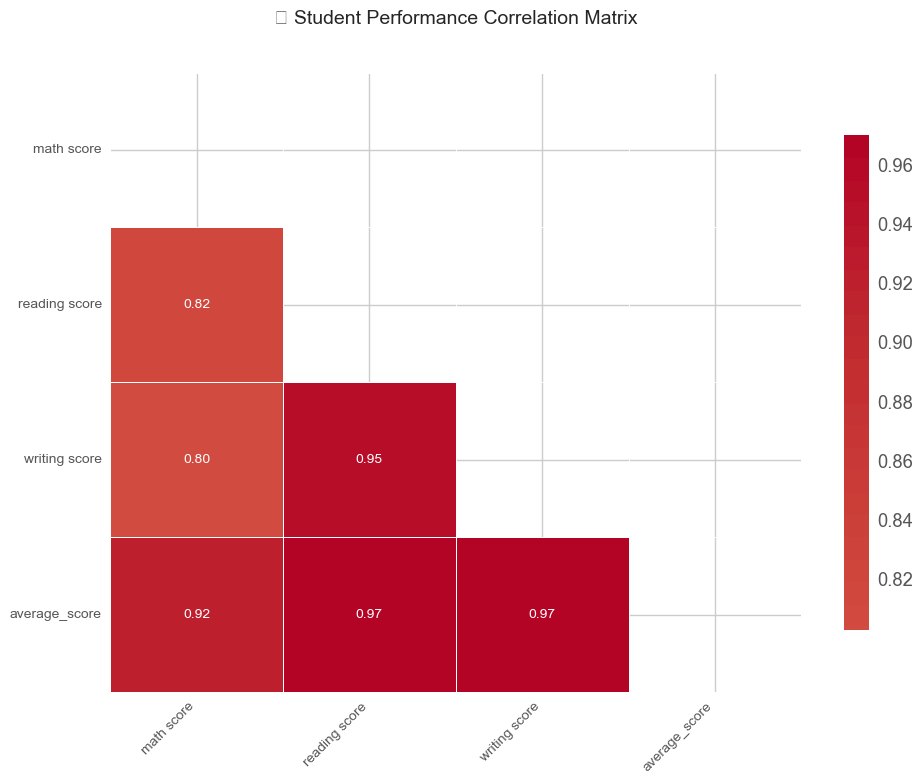

In [65]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()


corr_matrix = df[numeric_cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",  
    cmap='coolwarm',
    center=0,
    linewidths=.5,
    annot_kws={"size": 10},
    cbar_kws={"shrink": .8},
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))  


plt.title("🔍 Student Performance Correlation Matrix\n", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
for text in plt.gca().texts:
    t = float(text.get_text())
    if t > 0.7:
        text.set_color('white')
    elif t < -0.3:
        text.set_color('white')

plt.show()
